In [1]:
import pandas as pd

In [3]:
cust_shop_df = pd.read_csv("shopping_data.csv")
cust_shop_df.shape

(200, 5)

In [4]:
cust_shop_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
filter_cust_shop_df = cust_shop_df.iloc[:,3:5] # first 3 cols filtered out as they have no relevance

In [6]:
filter_cust_shop_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
import scipy.cluster.hierarchy as shc # scientific python scipy is lib for engineering and scientific applications
import matplotlib.pyplot as plt
%matplotlib inline

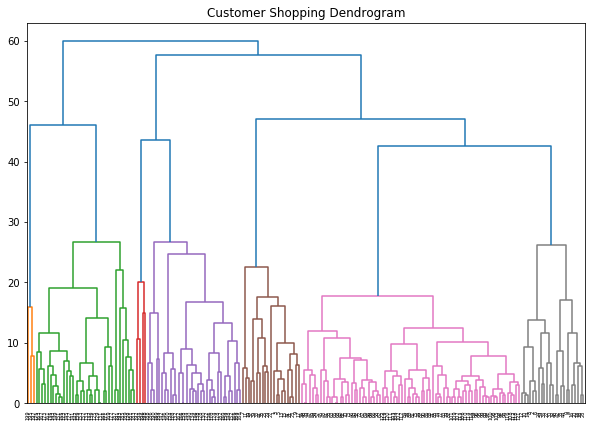

In [19]:
plt.figure(figsize=(10,7))
plt.title("Customer Shopping Dendrogram")
dend = shc.dendrogram(shc.linkage(filter_cust_shop_df.values, method ='average' )) # .values is passed as dendrogram requires numpy object

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
agglo_cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'manhattan', linkage = 'average')# after viewing dendrogram we have selected 7 clusterss

In [16]:
agglo_cluster.fit(filter_cust_shop_df)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7,
                        pooling_func='deprecated')

In [17]:
agglo_cluster.fit_predict(filter_cust_shop_df)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 6, 2, 6, 5, 6, 5,
       6, 5])

In [18]:
print(agglo_cluster.labels_)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 6 2 6 5 6 5 6 5]


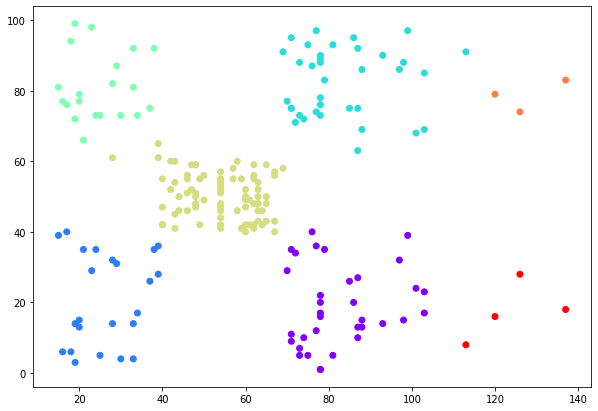

In [20]:
plt.figure(figsize = (10,7)) #initialise the canvas size
plt.scatter(filter_cust_shop_df.iloc[:,0] , filter_cust_shop_df.iloc[:,1] , c=agglo_cluster.labels_ , cmap ='rainbow' )